In [128]:
#encoding:utf-8
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;

import geopandas as gpd;

In [129]:
# Carregando os dados
data = pd.read_csv('./data/use-of-force.csv', sep=",").set_index('ID');

In [130]:
# Carregando dados geograficos
precinctsGeo = gpd.read_file('./data/spd-precincts.geojson');
beatsGeo = gpd.read_file('./data/spd-beats.geojson');
## Criando o mapa dos setores a partir dos beats
#     Como não foi possível encontrar os dados geográficos dos setores
#     iremos produzi-lo a partir dos beats
#     o nome dos beats é o nome do setor concatenado com um número inteiro entre 1 e 3
sectors = [w[0] for w in beatsGeo['name']];
beatsGeo['sector'] = sectors;
sectorsGeo = beatsGeo.dissolve(by='sector');
sectorsGeo['name'] = [w[0] for w in sectorsGeo['name']];

In [131]:
# Tratar dados faltantes
data['Precinct'] = data['Precinct'].fillna('-')
data[data['Precinct'] == 'X'] = '-';
# Beats faltantes ou ausentes => '-'
data['Beat'] = data['Beat'].fillna('-')
data[data['Beat'] == '99'] = '-';
data[data['Beat'] == 'XX'] = '-';
# Gênero e raça ausentes => '-'
data['Subject_Race'] = data['Subject_Race'].fillna('-');
data['Subject_Gender'] = data['Subject_Gender'].fillna('-');

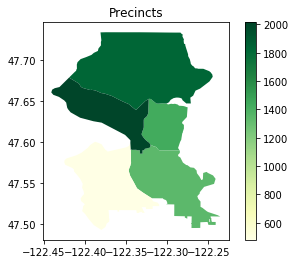

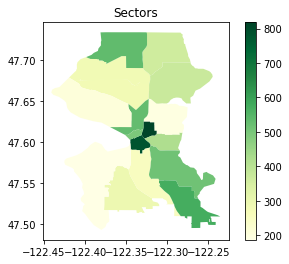

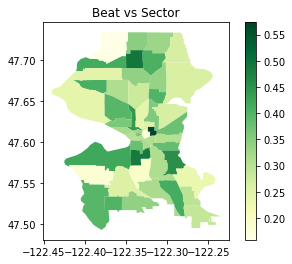

In [132]:
#Como as ocorrencias se distribuem nas delegacias e nos setores
pTotal = data['Precinct'].value_counts();
total = [];
for precName in precinctsGeo['name']:
    total.append(pTotal[precName]);
precinctsGeo['total'] = total;

sTotal = data['Sector'].value_counts();
total = [];
for secName in sectorsGeo['name']:
    total.append(sTotal[secName]);
sectorsGeo['total'] = total;

# Quanto um beat é "responsável" pelo resultado do seu setor?
bTotal = data['Beat'].value_counts();
total = [];
relSec = [];
for bName in beatsGeo['name']:
    total.append(bTotal[bName]);
    relSec.append(float(bTotal[bName])/sTotal[bName[0]]);
beatsGeo['total'] = total;
beatsGeo['relSec'] = relSec;

#Plots
precinctsGeo.plot(column='total', cmap='YlGn', legend=True).set_title('Precincts');
sectorsGeo.plot(column='total', cmap='YlGn', legend=True).set_title('Sectors');
beatsGeo.plot(column='relSec', cmap='YlGn', legend=True).set_title('Beat vs Sector');

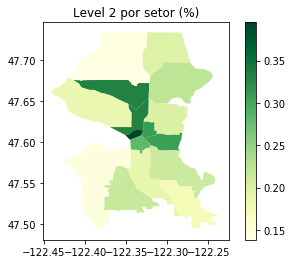

In [133]:
# Em cada setor, qual a proporção entre level 2 vs total do setor?

sTotal = data['Sector'].value_counts();
level2 = [];
for secName in sectorsGeo['name']:
    v = data[data['Sector']==secName]['Incident_Type'].value_counts()['Level 2 - Use of Force'];    
    level2.append(float(v)/sTotal[secName]);
sectorsGeo['level2'] = level2;


sectorsGeo.plot(column='level2', cmap='YlGn', legend=True).set_title('Level 2 por setor (%)');

In [44]:
for colName in data.keys():
    print colName, len(np.unique(data[colName]))

Incident_Num 5919
Incident_Type 2
Occured_date_time 4678
Precinct 6
Sector 19
Beat 53
Officer_ID 997
Subject_ID 3589
Subject_Race 6
Subject_Gender 2


In [16]:
for colName in data.keys():
    print(colName)
    for value in np.unique(data[colName]):
        print('  '+str(value))

Incident_Num
  178
  179
  218
  219
  220
  222
  223
  229
  239
  240
  251
  253
  254
  271
  284
  285
  286
  291
  292
  293
  301
  302
  303
  306
  307
  308
  309
  310
  311
  334
  335
  336
  337
  338
  341
  349
  350
  351
  352
  357
  358
  359
  360
  361
  362
  363
  364
  365
  366
  367
  368
  369
  370
  372
  376
  378
  379
  380
  381
  382
  392
  393
  394
  395
  396
  398
  399
  403
  404
  405
  406
  407
  408
  409
  410
  421
  424
  425
  426
  435
  436
  437
  438
  439
  440
  441
  447
  448
  455
  458
  459
  460
  465
  466
  467
  468
  469
  471
  472
  474
  475
  477
  478
  480
  481
  482
  483
  490
  491
  492
  493
  494
  495
  496
  497
  501
  503
  504
  505
  506
  507
  510
  518
  519
  520
  521
  527
  528
  529
  530
  531
  532
  533
  534
  535
  541
  550
  552
  553
  554
  555
  556
  557
  558
  559
  560
  561
  562
  563
  564
  565
  566
  567
  568
  569
  570
  571
  572
  574
  578
  581
  582
  583
  592
  5

  7543
  7547
  7548
  7549
  7562
  7563
  7567
  7574
  7575
  7576
  7577
  7578
  7584
  7589
  7591
  7593
  7594
  7595
  7596
  7597
  7605
  7606
  7615
  7617
  7618
  7619
  7622
  7623
  7624
  7625
  7627
  7630
  7634
  7635
  7636
  7638
  7639
  7640
  7643
  7645
  7646
  7647
  7648
  7649
  7650
  7651
  7652
  7654
  7655
  7656
  7664
  7666
  7670
  7672
  7673
  7697
  7703
  7704
  7705
  7706
  7707
  7708
  7709
  7718
  7721
  7731
  7733
  7734
  7735
  7736
  7737
  7739
  7740
  7741
  7742
  7743
  7745
  7746
  7747
  7751
  7755
  7756
  7761
  7763
  7764
  7765
  7766
  7767
  7768
  7771
  7773
  7777
  7778
  7780
  7781
  7782
  7783
  7788
  7791
  7793
  7794
  7795
  7798
  7801
  7802
  7803
  7804
  7811
  7812
  7813
  7815
  7816
  7817
  7818
  7819
  7821
  7823
  7824
  7825
  7826
  7827
  7829
  7830
  7831
  7833
  7848
  7849
  7850
  7851
  7856
  7860
  7861
  7863
  7864
  7866
  7872
  7873
  7874
  7880
  7882
  7884
  7885
  7886

  16590
  16591
  16592
  16593
  16596
  16599
  16622
  16628
  16633
  16643
  16645
  16646
  16648
  16649
  16672
  16674
  16676
  16682
  16688
  16689
  16692
  16693
  16694
  16695
  16696
  16698
  16699
  16700
  16701
  16704
  16706
  16707
  16710
  16711
  16713
  16716
  16717
  16718
  16720
  16724
  16725
  16729
  16730
  16735
  16736
  16740
  16741
  16742
  16743
  16745
  16747
  16796
  16797
  16798
  16800
  16801
  16802
  16803
  16809
  16810
  16822
  16823
  16824
  16825
  16826
  16827
  16828
  16830
  16831
  16841
  16842
  16846
  16850
  16851
  16853
  16854
  16856
  16858
  16861
  16864
  16866
  16867
  16869
  16870
  16871
  16872
  16873
  16882
  16883
  16884
  16888
  16889
  16891
  16895
  16900
  16901
  16903
  16904
  16906
  16918
  16919
  16924
  16925
  16926
  16928
  16929
  16931
  16932
  16941
  16942
  16943
  16944
  16945
  16947
  16948
  16950
  16952
  16959
  16962
  16964
  16968
  16970
  16972
  16973
  16974


  2014-11-16T23:50:00
  2014-11-17T12:30:00
  2014-11-17T14:53:00
  2014-11-17T23:17:00
  2014-11-19T10:30:00
  2014-11-19T13:25:00
  2014-11-19T13:28:00
  2014-11-19T19:27:00
  2014-11-19T19:28:00
  2014-11-19T19:30:00
  2014-11-19T19:34:00
  2014-11-19T22:40:00
  2014-11-19T22:55:00
  2014-11-19T23:06:00
  2014-11-19T23:07:00
  2014-11-20T03:25:00
  2014-11-20T06:00:00
  2014-11-20T06:05:00
  2014-11-20T06:10:00
  2014-11-20T12:24:00
  2014-11-21T07:21:00
  2014-11-21T07:44:00
  2014-11-21T13:16:00
  2014-11-21T13:23:00
  2014-11-21T15:19:00
  2014-11-21T15:28:00
  2014-11-21T17:46:00
  2014-11-22T12:20:00
  2014-11-23T01:45:00
  2014-11-23T03:49:00
  2014-11-23T06:36:00
  2014-11-23T14:00:00
  2014-11-23T14:37:00
  2014-11-23T17:00:00
  2014-11-23T17:11:00
  2014-11-23T17:30:00
  2014-11-24T12:25:00
  2014-11-24T22:00:00
  2014-11-24T22:30:00
  2014-11-25T20:10:00
  2014-11-25T20:12:00
  2014-11-25T20:15:00
  2014-11-25T22:00:00
  2014-11-27T00:25:00
  2014-11-27T15:53:00
  2014-11-

  2017-01-31T04:34:00
  2017-01-31T04:50:00
  2017-01-31T09:11:00
  2017-02-01T04:39:00
  2017-02-01T21:00:00
  2017-02-02T14:55:00
  2017-02-02T17:50:00
  2017-02-02T23:13:00
  2017-02-03T00:04:00
  2017-02-03T02:52:00
  2017-02-03T21:38:00
  2017-02-03T22:05:00
  2017-02-04T03:45:00
  2017-02-04T03:55:00
  2017-02-05T06:05:00
  2017-02-06T05:56:00
  2017-02-06T06:58:00
  2017-02-07T00:46:00
  2017-02-07T07:30:00
  2017-02-07T23:24:00
  2017-02-08T11:58:00
  2017-02-08T13:50:00
  2017-02-08T13:55:00
  2017-02-08T15:10:00
  2017-02-08T15:15:00
  2017-02-08T20:45:00
  2017-02-08T21:30:00
  2017-02-10T19:51:00
  2017-02-10T20:26:00
  2017-02-11T00:32:00
  2017-02-11T02:10:00
  2017-02-11T09:43:00
  2017-02-11T14:10:00
  2017-02-12T13:32:00
  2017-02-12T13:52:00
  2017-02-13T08:40:00
  2017-02-13T08:54:00
  2017-02-13T08:56:00
  2017-02-13T09:50:00
  2017-02-15T04:37:00
  2017-02-16T02:11:00
  2017-02-16T11:07:00
  2017-02-16T17:15:00
  2017-02-17T02:58:00
  2017-02-17T04:15:00
  2017-02-

  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  nan
  na

  2891
  2892
  2894
  2896
  2897
  2898
  2899
  2900
  2901
  2910
  2911
  2912
  2915
  2920
  2926
  2931
  2932
  2935
  2936
  2954
  2956
  2958
  2959
  2960
  2961
  2963
  2964
  2966
  2968
  2971
  2977
  2978
  2982
  2983
  2984
  2985
  2986
  2989
  2998
  2999
  3004
  3005
  3007
  3013
  3014
  3015
  3018
  3030
  3031
  3032
  3033
  3034
  3036
  3041
  3044
  3045
  3046
  3047
  3048
  3058
  3059
  3061
  3062
  3063
  3064
  3065
  3066
  3067
  3070
  3071
  3074
  3075
  3076
  3078
  3079
  3085
  3094
  3101
  3103
  3104
  3128
  3129
  3131
  3132
  3167
  3196
  3197
  3198
  3203
  3204
  3205
  3206
  3207
  3208
  3210
  3212
  3237
  3238
  3240
  3241
  3265
  3273
  3274
  3275
  3276
  3277
  3278
  3283
  3285
  3286
  3287
  3289
  3290
  3293
  3294
  3296
  3301
  3302
  3309
  3321
  3335
  3350
  3362
  3363
  3365
  3366
  3367
  3374
  3378
  3382
  3383
  3384
  3386
  3396
  3397
  3399
  3400
  3411
  3412
  3427
  3428
  3429
  3430

  14882
  14885
  14891
  14894
  14901
  14908
  14909
  14910
  14918
  14919
  14920
  14921
  14922
  14923
  14928
  14930
  14931
  14936
  14937
  14938
  14940
  14943
  14944
  14945
  14946
  14947
  14948
  14950
  14952
  14953
  14960
  14961
  14968
  14969
  14972
  14973
  14979
  14980
  14985
  15017
  15023
  15026
  15027
  15028
  15034
  15038
  15041
  15046
  15105
  15108
  15110
  15113
  15117
  15120
  15121
  15122
  15123
  15125
  15130
  15132
  15137
  15139
  15141
  15145
  15155
  15158
  15172
  15176
  15178
  15181
  15185
  15193
  15194
  15196
  15197
  15199
  15200
  15202
  15210
  15213
  15218
  15220
  15222
  15228
  15230
  15241
  15242
  15246
  15248
  15254
  15256
  15257
  15258
  15259
  15260
  15261
  15262
  15272
  15273
  15274
  15276
  15281
  15282
  15283
  15284
  15289
  15290
  15292
  15293
  15294
  15300
  15301
  15302
  15303
  15307
  15310
  15313
  15317
  15340
  15344
  15347
  15361
  15363
  15366
  15370


## Descrição do experimento

A seguir veremos figuras que ilustram a distribuição dos atributos categóricos do dataset. Cada atributo será visualizado de três formas:
    1. distribuição geral (em todo o dataset)
    2. distribuição dos dados das amostras aprovadas
    3. distribuição dos dados das amostras recusadas    
    
Os atributos com poucas categorias serão visualizados na forma de um gráfico de pizza onde a fatia indica a quantidade de amostras com cada valor. Os atributos com muitas categorias serão vistos na forma de histograma, uma vez que o gráfico de pizza ficaria com a visualização bem comprometida. O histograma não é exatamente a melhor forma, uma vez que não há uma relação de proximidade entre os valores, mas ao menos nos permitirá enxergar de forma mais clara a distribuição dos dados.

A resposta foi rotulada como 0 para <b>aprovada</b> e 1 para <b>recusada</b>

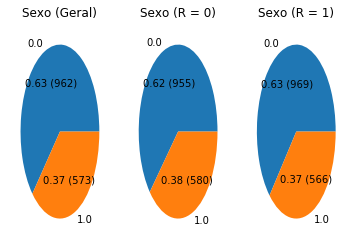

In [3]:
plt.subplot(131)
plt.title('Sexo (Geral)')
d = 0
values = []
for v in np.unique(data.iloc[:,d]):
    values.append(np.sum(data.iloc[:,d] == v))
p = plt.pie(values, labels = np.unique(data.iloc[:,d]), autopct=lambda p: '%.2f (%.0f)' % (p / 100, p * N / 100))

plt.subplot(132)
plt.title('Sexo (R = 0)')
v0 = data.iloc[(data.iloc[:,-1] == 0).values, d]
values = []
for v in np.unique(data.iloc[:,d]):
    values.append(np.sum(v0 == v))
p = plt.pie(values, labels = np.unique(data.iloc[:,d]), autopct=lambda p: '%.2f (%.0f)' % (p / 100, p * N / 100))

plt.subplot(133)
plt.title('Sexo (R = 1)')
v0 = data.iloc[(data.iloc[:,-1] == 1).values, d]
values = []
for v in np.unique(data.iloc[:,d]):
    values.append(np.sum(v0 == v))
p = plt.pie(values, labels = np.unique(data.iloc[:,d]), autopct=lambda p: '%.2f (%.0f)' % (p / 100, p * N / 100))

#valores distintos: 291


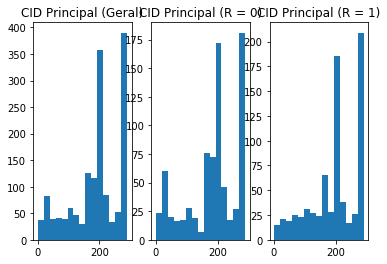

In [4]:
print('#valores distintos: %d' % (np.unique(data.iloc[:,1]).size))
d = 1

plt.subplot(131)
plt.title('CID Principal (Geral)')
h = plt.hist(data.iloc[:,d], bins = 15)

plt.subplot(132)
plt.title('CID Principal (R = 0)')
v0 = data.iloc[(data.iloc[:,-1] == 0).values, d]
h = plt.hist(v0, bins = 15)

plt.subplot(133)
plt.title('CID Principal (R = 1)')
v0 = data.iloc[(data.iloc[:,-1] == 1).values, d]
h = plt.hist(v0, bins = 15)

#valores distintos: 291


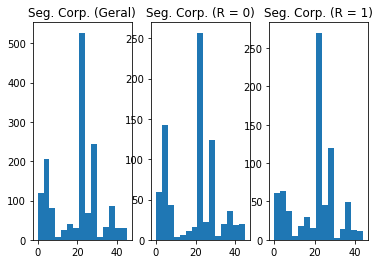

In [5]:
print('#valores distintos: %d' % (np.unique(data.iloc[:,1]).size))
d = 2

plt.subplot(131)
plt.title('Seg. Corp. (Geral)')
h = plt.hist(data.iloc[:,d], bins = 15)

plt.subplot(132)
plt.title('Seg. Corp. (R = 0)')
v0 = data.iloc[(data.iloc[:,-1] == 0).values, d]
h = plt.hist(v0, bins = 15)

plt.subplot(133)
plt.title('Seg. Corp. (R = 1)')
v0 = data.iloc[(data.iloc[:,-1] == 1).values, d]
h = plt.hist(v0, bins = 15)

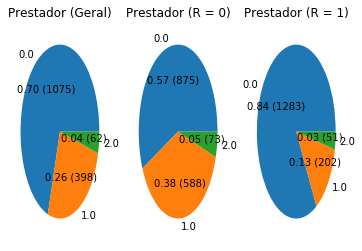

In [6]:
plt.subplot(131)
plt.title('Prestador (Geral)')
d = 3
values = []
for v in np.unique(data.iloc[:,d]):
    values.append(np.sum(data.iloc[:,d] == v))
p = plt.pie(values, labels = np.unique(data.iloc[:,d]), autopct=lambda p: '%.2f (%.0f)' % (p / 100, p * N / 100))

plt.subplot(132)
plt.title('Prestador (R = 0)')
v0 = data.iloc[(data.iloc[:,-1] == 0).values, d]
values = []
for v in np.unique(data.iloc[:,d]):
    values.append(np.sum(v0 == v))
p = plt.pie(values, labels = np.unique(data.iloc[:,d]), autopct=lambda p: '%.2f (%.0f)' % (p / 100, p * N / 100))

plt.subplot(133)
plt.title('Prestador (R = 1)')
v0 = data.iloc[(data.iloc[:,-1] == 1).values, d]
values = []
for v in np.unique(data.iloc[:,d]):
    values.append(np.sum(v0 == v))
p = plt.pie(values, labels = np.unique(data.iloc[:,d]), autopct=lambda p: '%.2f (%.0f)' % (p / 100, p * N / 100))

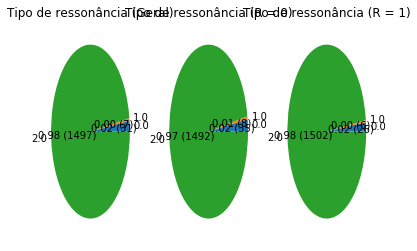

In [7]:
plt.subplot(131)
plt.title('Tipo de ressonância (Geral)')
d = 4
values = []
for v in np.unique(data.iloc[:,d]):
    values.append(np.sum(data.iloc[:,d] == v))
p = plt.pie(values, labels = np.unique(data.iloc[:,d]), autopct=lambda p: '%.2f (%.0f)' % (p / 100, p * N / 100))

plt.subplot(132)
plt.title('Tipo de ressonância (R = 0)')
v0 = data.iloc[(data.iloc[:,-1] == 0).values, d]
values = []
for v in np.unique(data.iloc[:,d]):
    values.append(np.sum(v0 == v))
p = plt.pie(values, labels = np.unique(data.iloc[:,d]), autopct=lambda p: '%.2f (%.0f)' % (p / 100, p * N / 100))

plt.subplot(133)
plt.title('Tipo de ressonância (R = 1)')
v0 = data.iloc[(data.iloc[:,-1] == 1).values, d]
values = []
for v in np.unique(data.iloc[:,d]):
    values.append(np.sum(v0 == v))
p = plt.pie(values, labels = np.unique(data.iloc[:,d]), autopct=lambda p: '%.2f (%.0f)' % (p / 100, p * N / 100))

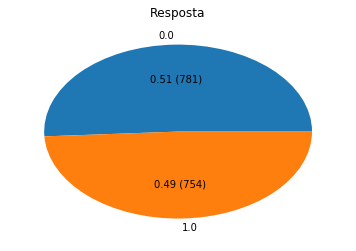

In [8]:
plt.title('Resposta')
values = []
for v in np.unique(data.iloc[:,-1]):
    values.append(np.sum(data.iloc[:,-1] == v))
p = plt.pie(values, labels = np.unique(data.iloc[:,-1]), autopct=lambda p: '%.2f (%.0f)' % (p / 100, p * N / 100))

# Análise dos resultados

Exceto pelo atributo <b>prestador</b>, todos os outros não possuem uma relação muito evidente com a aprovação ou não da solicitação.
Em relação ao prestador, verificamos que a CEMISE é responsável por 70% das solicitações, mas corresponde a apenas 57% dos aprovados e, por outro lado, sobe para 84% quando analisamos apenas as solicitações recusadas. Isso pode indicar que este prestador tem uma tendencia maior de solicitar o exame de forma desnescessária.